**<span style="font-size: 24px;">Load Packages</span>**

In [48]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

**<span style="font-size: 24px;">Load CSVs</span>**

In [2]:
ny = pd.read_csv(f'CSVafterClean2/ny_12.csv')
fl = pd.read_csv(f'CSVafterClean3/_12.csv')

**<span style="font-size: 24px;">Precipitation vs Time</span>**

In [3]:
#initialize dfs
ny_snip = ny
fl_snip = fl

# Convert 'time' column to datetime
ny_snip['time'] = pd.to_datetime(ny_snip['time'])
fl_snip['time'] = pd.to_datetime(fl_snip['time'])

# Group by date and calculate the average precipitation for each day
ny_snip = ny_snip.groupby(ny_snip['time'].dt.date)['prcp_total'].mean().reset_index() #can only use .dt accessor with datetimelike values
fl_snip = fl_snip.groupby(fl_snip['time'].dt.date)['prcp_total'].mean().reset_index()

#print('New York',ny_snip)
#print('Florida',fl_snip)

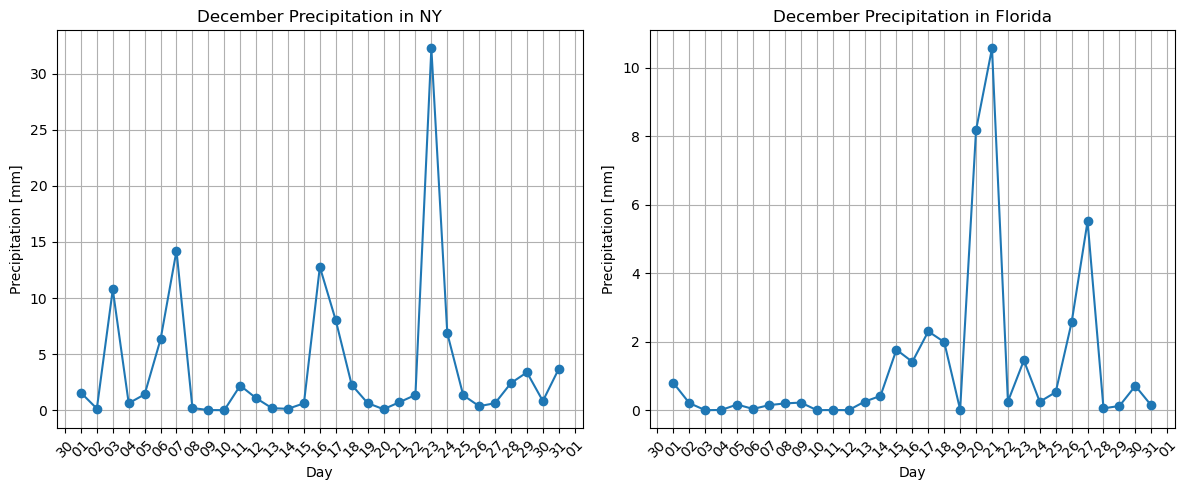

In [4]:
# Create subplots with two line graphs
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(ny_snip['time'], ny_snip['prcp_total'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in NY')
plt.grid(True)

# Format the x-axis ticks to show one label per day
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(fl_snip['time'], fl_snip['prcp_total'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in Florida')
plt.grid(True)

# Format the x-axis ticks to show one label per day
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

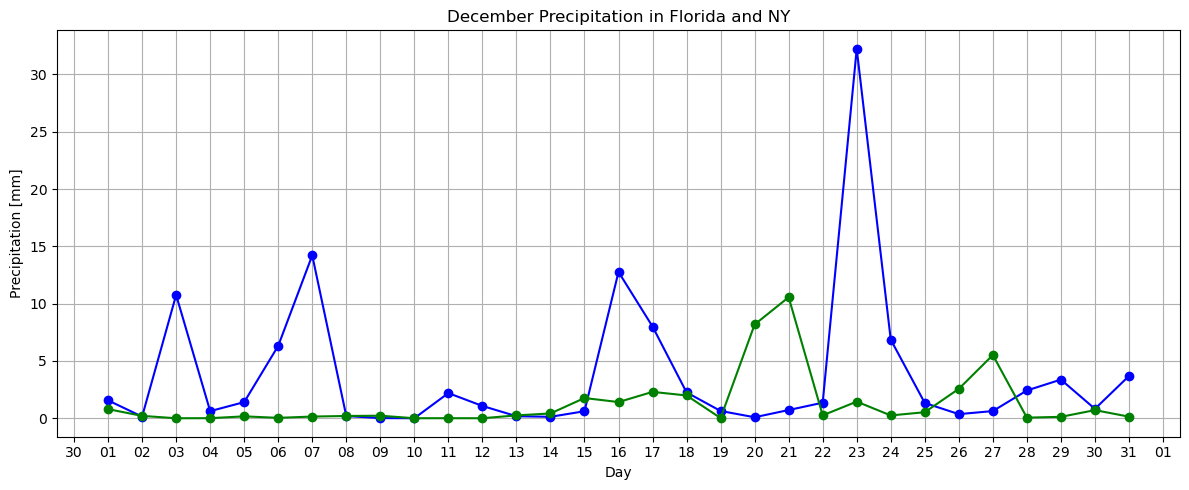

In [5]:
# Create subplots with two line graphs
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

plt.plot(ny_snip['time'], ny_snip['prcp_total'], color = 'b', marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in NY')
plt.grid(True)

# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.plot(fl_snip['time'], fl_snip['prcp_total'], color = 'g', marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in Florida and NY')
plt.grid(True)

# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**<span style="font-size: 24px;">Spatial Distribution</span>**

C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


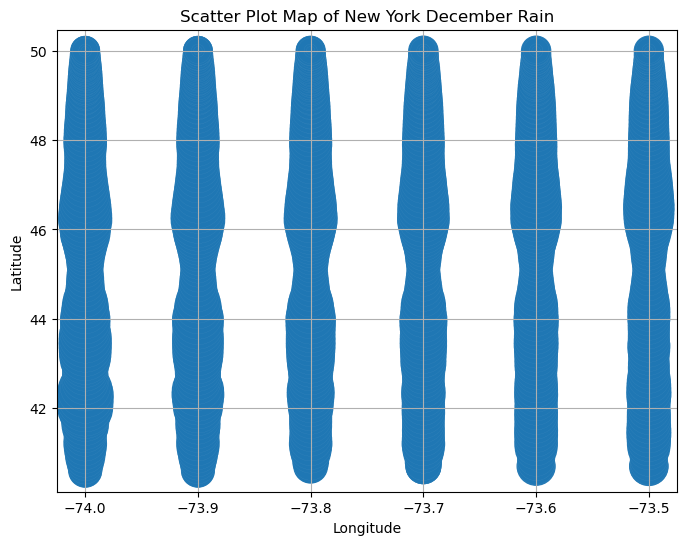

C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


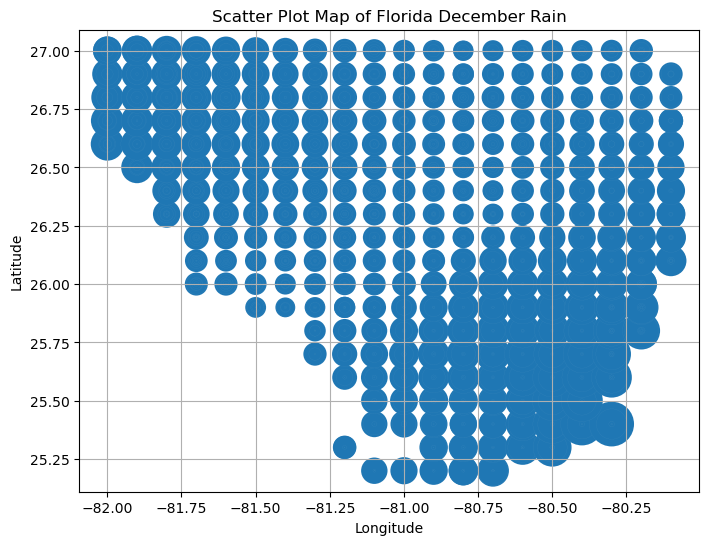

In [6]:
locations = {'New York': ny, 'Florida': fl}

for location, df in locations.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='lon', y='lat', data=df, marker='o', s=df['prcp_total']*30)
    plt.title(f"Scatter Plot Map of {location} December Rain")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    # Save the plot to a file (optional)
    # plt.savefig(f"CSVafterClean/map_prpc_{location}.png", dpi=300, bbox_inches='tight')
    # Show the plot (optional)
    plt.show()


**<span style="font-size: 24px;">Group Categorically</span>**

In [7]:
def catAn(df):
    df = df['next_day_prcp_total']
    # Calculate statistics
    mean = np.mean(df)
    std_dev = np.std(df)
    # Calculate the percentiles
    a = 0.6
    b = 0.95
    percentile_a = df.quantile(a)
    percentile_b = df.quantile(b)
    # Count data points within the percentile ranges
    count_below_a = np.sum(df < percentile_a)
    count_a_to_b = np.sum((df >= percentile_a) & (df <= percentile_b))
    count_above_b = np.sum(df > percentile_b)

    # Create subplots with two histograms
    plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
    plt.hist(df, bins=20, density=True, alpha=0.6, color='b')
    plt.axvline(mean, color='k', linestyle='dashed', linewidth=2, label=f"Mean = {mean:.2f}")
    plt.axvline(mean + std_dev, color='r', linestyle='dashed', linewidth=2, label=f"Std Deviation = {std_dev:.2f}", )
    plt.axvline(mean - std_dev, color='r', linestyle='dashed', linewidth=2)
    plt.legend()
    plt.title("Distribution of Data")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
    plt.hist(df, bins=20, density=True, alpha=0.6, color='b')
    plt.axvline(percentile_a, color='g', linestyle='dashed', linewidth=2, label=f"Percentile {int(a*100)}% = {percentile_a:.2f} mm")
    plt.axvline(percentile_b, color='b', linestyle='dashed', linewidth=2, label=f"Percentile {int(b*100)}% = {percentile_b:.2f} mm", )
    plt.legend()
    plt.title("Distribution of Data")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    print('Category 0 is from 0 to ' + str(round(percentile_a, 3)) + ' mm of rain')
    print(f"Number of data points below the {a*100}% percentile: {count_below_a}")
    print('Category 1 is from ' + str(round(percentile_a, 3)) + ' mm of rain to ' + str(round(percentile_b, 3)) + ' mm of rain')
    print(f"Number of data points in the {a*100}% to {b*100}% range: {count_a_to_b}")
    print('Category 2 is from ' + str(round(percentile_b, 3)) + ' mm of rain to the maximum')
    print(f"Number of data points above the {b*100}% percentile: {count_above_b}")
  
    # Create categorical labels based on percentiles
    dfCol = pd.cut(
        df,
        bins=[float('-inf'), percentile_a, percentile_b, float('inf')],
        labels=['0', '1', '2']
    )
    
    return dfCol

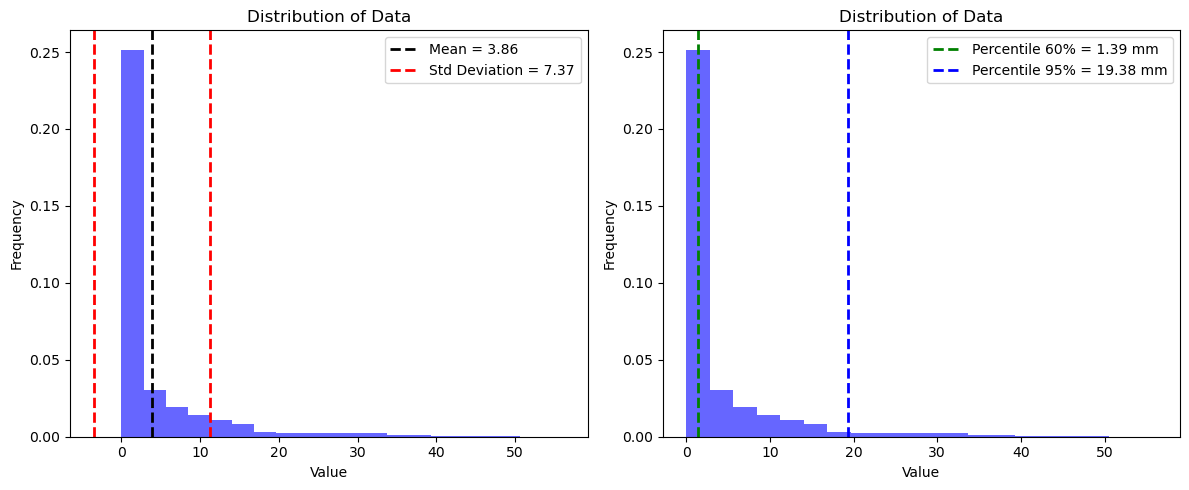

Category 0 is from 0 to 1.391 mm of rain
Number of data points below the 60.0% percentile: 10452
Category 1 is from 1.391 mm of rain to 19.378 mm of rain
Number of data points in the 60.0% to 95.0% range: 6098
Category 2 is from 19.378 mm of rain to the maximum
Number of data points above the 95.0% percentile: 872


In [8]:
ny['nxtpr_cat'] = catAn(ny)

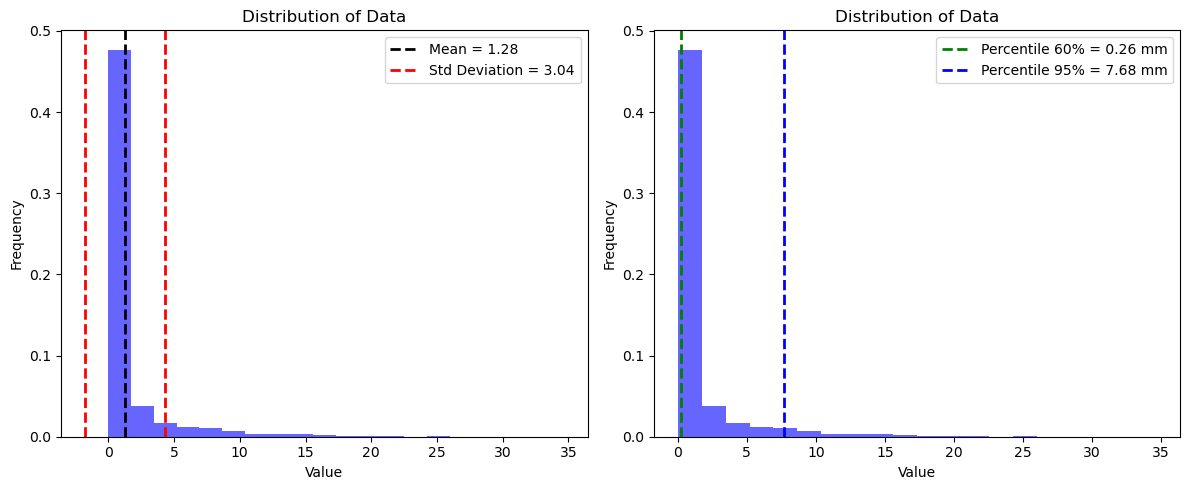

Category 0 is from 0 to 0.255 mm of rain
Number of data points below the 60.0% percentile: 5189
Category 1 is from 0.255 mm of rain to 7.678 mm of rain
Number of data points in the 60.0% to 95.0% range: 3027
Category 2 is from 7.678 mm of rain to the maximum
Number of data points above the 95.0% percentile: 433


In [9]:
fl['nxtpr_cat'] = catAn(fl)

**<span style="font-size: 24px;">Data Exploration</span>**

In [10]:
print(ny[['next_day_prcp_total', 'nxtpr_cat']])

       next_day_prcp_total nxtpr_cat
0                 0.000858         0
1                10.728631         1
2                 0.001715         0
3                 0.001715         0
4                 3.843783         1
...                    ...       ...
17417             1.180921         0
17418            11.342675         1
17419             3.285482         1
17420             1.258963         0
17421             0.165100         0

[17422 rows x 2 columns]


In [11]:
print(fl[['next_day_prcp_total', 'nxtpr_cat']])

      next_day_prcp_total nxtpr_cat
0                0.428093         1
1                0.001057         0
2                0.000529         0
3                0.016912         0
4                0.125785         0
...                   ...       ...
8644             0.228316         0
8645             0.025368         0
8646             0.935990         1
8647             0.420694         1
8648             0.082199         0

[8649 rows x 2 columns]


**<span style="font-size: 24px;">Load Models</span>**

In [12]:
# Load the Neural Network model using joblib
model_nn = joblib.load("nn_rain_ext.pkl")

# Load the Random Forest model using joblib
model_rf = joblib.load("rf_rain_ext.pkl")

# Load the XGBoost model using joblib
model_xg = joblib.load("xg_rain_ext.pkl")

print("Models Loaded")

Models Loaded


**<span style="font-size: 24px;">Generate Predictions</span>**

In [13]:
def gen_pred(df):
    exclude = ['next_day_prcp_total', 'nxtpr_cat', 'time', 'lat', 'lon']
    features = df.loc[:, ~df.columns.isin(exclude)]
    col_names = features.columns
    #standardize features with a standard scaler, 
        #since model was trained on standardized features, if you omit this then the model 
        #will output wildly high magnitude quantities
    s_scaler = StandardScaler()
    features = s_scaler.fit_transform(features)
    features = pd.DataFrame(features, columns=col_names) 
    pred_nn = model_nn.predict(features)
    pred_rf = model_rf.predict(features)
    pred_xg = model_xg.predict(features)
    
    df['nn_pred'] = pred_nn # separate assigning it to df as a column bc otherwise the features 45 col instead of model's expected 44
    df['rf_pred'] = pred_rf
    df['xg_pred'] = pred_xg
    
        #Categorize neural net results to compare it to the classifiers
    # Calculate the percentiles
    a = 0.6
    b = 0.95
    percentile_a = df['nn_pred'].quantile(a)
    percentile_b = df['nn_pred'].quantile(b)

    dfa = df['nn_pred']
    
    # Create categorical labels based on percentiles
    nnCat = pd.cut(
        dfa,
        bins=[float('-inf'), percentile_a, percentile_b, float('inf')],
        labels=['0', '1', '2']
    )
    
    df['nnCat'] = nnCat
            
    return df

In [14]:
pred_ny = ny
pred_fl = fl
pred_ny = gen_pred(pred_ny)
pred_fl = gen_pred(pred_fl)
pred_ny = pred_ny.loc[:,['next_day_prcp_total', 'nxtpr_cat','time','nn_pred','rf_pred','xg_pred','nnCat']]
pred_fl = pred_fl.loc[:,['next_day_prcp_total', 'nxtpr_cat','time','nn_pred','rf_pred','xg_pred','nnCat']]

271/271 [==============================] - 0s 627us/step


**<span style="font-size: 24px;">Data Exploration</span>**

In [15]:
pred_ny.dtypes

next_day_prcp_total           float64
nxtpr_cat                    category
time                   datetime64[ns]
nn_pred                       float32
rf_pred                        object
xg_pred                         int64
nnCat                        category
dtype: object

In [32]:
pred_fl.dtypes

next_day_prcp_total           float64
nxtpr_cat                    category
time                   datetime64[ns]
nn_pred                       float32
rf_pred                        object
xg_pred                         int64
nnCat                        category
dtype: object

In [39]:
print(pred_ny['nnCat'].describe())
print(pred_ny['nxtpr_cat'].describe())
print(pred_ny['xg_pred'].describe())
print(pred_ny['rf_pred'].describe())
print(pred_ny['next_day_prcp_total'].describe())
print(pred_ny['nn_pred'].describe())

count     17422
unique        3
top           0
freq      10453
Name: nnCat, dtype: object
count     17422
unique        3
top           0
freq      10454
Name: nxtpr_cat, dtype: object
count    17422.000000
mean         0.345024
std          0.497573
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: xg_pred, dtype: float64
count     17422
unique        3
top           0
freq      12235
Name: rf_pred, dtype: object
count    1.742200e+04
mean     3.858676e+00
std      7.373894e+00
min     -3.469447e-15
25%      2.401292e-02
50%      4.964994e-01
75%      3.910462e+00
max      5.620139e+01
Name: next_day_prcp_total, dtype: float64
count    17422.000000
mean         1.143511
std          2.020737
min         -5.456779
25%          0.066277
50%          0.722711
75%          2.049328
max         15.614716
Name: nn_pred, dtype: float64


In [35]:
pred_fl.describe()

,next_day_prcp_total,nn_pred,xg_pred
count,8.649000e+03,8649.000000,8649.000000
mean,1.282288e+00,1.234443,0.383281
std,3.036130e+00,1.268596,0.506939
min,-3.469447e-15,-2.586165,0.000000
25%,5.285096e-03,0.341753,0.000000
50%,1.178576e-01,1.002364,0.000000
75%,7.948784e-01,1.909153,1.000000
max,3.463482e+01,7.717388,2.000000


In [40]:
pred_ny.describe()

,next_day_prcp_total,nn_pred,xg_pred
count,1.742200e+04,17422.000000,17422.000000
mean,3.858676e+00,1.143511,0.345024
std,7.373894e+00,2.020737,0.497573
min,-3.469447e-15,-5.456779,0.000000
25%,2.401292e-02,0.066277,0.000000
50%,4.964994e-01,0.722711,0.000000
75%,3.910462e+00,2.049328,1.000000
max,5.620139e+01,15.614716,2.000000


In [16]:
pred_ny

,next_day_prcp_total,nxtpr_cat,time,nn_pred,rf_pred,xg_pred,nnCat
0,0.000858,0,2022-12-01,0.634672,0,1,0
1,10.728631,1,2022-12-02,-0.045112,0,0,0
2,0.001715,0,2022-12-03,4.335457,1,0,1
3,0.001715,0,2022-12-04,2.169055,1,1,1
4,3.843783,1,2022-12-05,1.781298,1,1,1
...,...,...,...,...,...,...,...
17417,1.180921,0,2022-12-27,0.768045,0,0,0
17418,11.342675,1,2022-12-28,0.537940,0,0,0
17419,3.285482,1,2022-12-29,-1.607829,0,1,0
17420,1.258963,0,2022-12-30,2.423182,1,1,1


In [17]:
pred_fl

,next_day_prcp_total,nxtpr_cat,time,nn_pred,rf_pred,xg_pred,nnCat
0,0.428093,1,2022-12-01,0.161013,1,1,0
1,0.001057,0,2022-12-02,-0.474769,0,1,0
2,0.000529,0,2022-12-03,0.286668,1,0,0
3,0.016912,0,2022-12-04,1.496689,0,0,1
4,0.125785,0,2022-12-05,1.083910,1,1,0
...,...,...,...,...,...,...,...
8644,0.228316,0,2022-12-27,0.028671,0,1,0
8645,0.025368,0,2022-12-28,2.582936,0,0,1
8646,0.935990,1,2022-12-29,0.283035,1,1,0
8647,0.420694,1,2022-12-30,2.906575,0,1,1


In [18]:
pred_ny.dtypes

next_day_prcp_total           float64
nxtpr_cat                    category
time                   datetime64[ns]
nn_pred                       float32
rf_pred                        object
xg_pred                         int64
nnCat                        category
dtype: object

In [19]:
# Check for NA values in 'nnCat' column
nnCat_na = pred_ny['nnCat'].isna().sum()

# Check for NA values in 'nn_pred' column
nn_pred_na = pred_ny['nn_pred'].isna().sum()

# Check for NA values in 'xg_pred' column
xg_pred_na = pred_ny['xg_pred'].isna().sum()

# Check for NA values in 'rf_pred' column
rf_pred_na = pred_ny['rf_pred'].isna().sum()

# Check for NA values in 'nxtpr_cat' column
nxtpr_cat_na = pred_ny['nxtpr_cat'].isna().sum()

print(f'NA values in nnCat: {nnCat_na}')
print(f'NA values in nn_pred: {nn_pred_na}')
print(f'NA values in xg_pred: {xg_pred_na}')
print(f'NA values in rf_pred: {rf_pred_na}')
print(f'NA values in nxtpr_cat: {nxtpr_cat_na}')


NA values in nnCat: 0
NA values in nn_pred: 0
NA values in xg_pred: 0
NA values in rf_pred: 0
NA values in nxtpr_cat: 0


In [20]:
# Check for NA values in 'nnCat' column
nnCat_na = pred_fl['nnCat'].isna().sum()

# Check for NA values in 'nn_pred' column
nn_pred_na = pred_fl['nn_pred'].isna().sum()

# Check for NA values in 'xg_pred' column
xg_pred_na = pred_fl['xg_pred'].isna().sum()

# Check for NA values in 'rf_pred' column
rf_pred_na = pred_fl['rf_pred'].isna().sum()

# Check for NA values in 'nxtpr_cat' column
nxtpr_cat_na = pred_fl['nxtpr_cat'].isna().sum()

print(f'NA values in nnCat: {nnCat_na}')
print(f'NA values in nn_pred: {nn_pred_na}')
print(f'NA values in xg_pred: {xg_pred_na}')
print(f'NA values in rf_pred: {rf_pred_na}')
print(f'NA values in nxtpr_cat: {nxtpr_cat_na}')


NA values in nnCat: 0
NA values in nn_pred: 0
NA values in xg_pred: 0
NA values in rf_pred: 0
NA values in nxtpr_cat: 0


**<span style="font-size: 24px;">Evaluate Neural Network Regression</span>**

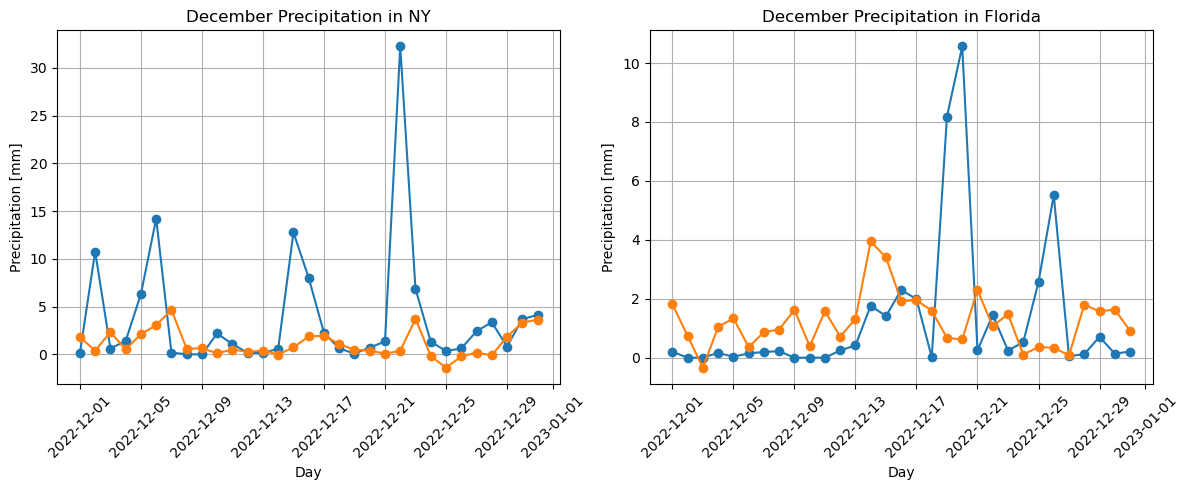

In [21]:
# Initialize DataFrames
ny_snip_pred = pred_ny.copy()
fl_snip_pred = pred_fl.copy()

# Convert 'time' column to datetime
ny_snip_pred['time'] = pd.to_datetime(ny_snip_pred['time'])
fl_snip_pred['time'] = pd.to_datetime(fl_snip_pred['time'])

# Group by date and calculate the average precipitation for each day
ny_snip_pred = ny_snip_pred.groupby(ny_snip_pred['time'].dt.date)[['next_day_prcp_total', 'nn_pred']].mean().reset_index()
fl_snip_pred = fl_snip_pred.groupby(fl_snip_pred['time'].dt.date)[['next_day_prcp_total', 'nn_pred']].mean().reset_index()

# Create subplots with two line graphs
plt.figure(figsize=(12, 5))

# Plot NY data
plt.subplot(1, 2, 1)
plt.plot(ny_snip_pred['time'], ny_snip_pred['next_day_prcp_total'], marker='o', linestyle='-', label='Actual')
plt.plot(ny_snip_pred['time'], ny_snip_pred['nn_pred'], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in NY')
plt.grid(True)
plt.xticks(rotation=45)

# Plot FL data
plt.subplot(1, 2, 2)
plt.plot(fl_snip_pred['time'], fl_snip_pred['next_day_prcp_total'], marker='o', linestyle='-', label='Actual')
plt.plot(fl_snip_pred['time'], fl_snip_pred['nn_pred'], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in Florida')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [41]:
def compare(df, model):
    if model == 'nn':
            df1 = df['next_day_prcp_total']
            df2 = df['nn_pred']
            bins = 20
    if model == 'nnCat':
            df1 = df['nxtpr_cat']
            df2 = df['nnCat']
            bins = 3
    if model == 'rf':
            df1 = df['nxtpr_cat']
            df2 = df['rf_pred']
            bins = 3
    if model == 'xg':
            df1 = df['nxtpr_cat']
            df2 = df['xg_pred']
            bins = 3
    # Calculate statistics
    dfc = df['next_day_prcp_total']
    dfp = df['nn_pred']
    mean1 = np.mean(dfc)
    std_dev1 = np.std(dfc)
    mean2 = np.mean(dfp)
    std_dev2 = np.std(dfp)
    # Calculate the percentiles
    a = 0.6
    b = 0.95
    percentile_a = dfc.quantile(a)
    percentile_b = dfc.quantile(b)
    percApred = 0.649 #model was trained on
    percBpred = 4.408 #model was trained on
    # Count data points within the percentile ranges
    count_below_a = np.sum(dfc < percApred)
    count_a_to_b = np.sum((dfc >= percApred) & (dfc <= percBpred))
    count_above_b = np.sum(dfc > percBpred)

    # Create subplots with two histograms
    if model == 'nn':
        plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
        
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
        plt.hist(df1, bins=bins, density=True, alpha=0.6, color='b')
        plt.hist(df2, bins=bins, density=True, alpha=0.6, color='g')
        plt.axvline(mean1, color='g', linestyle='dashed', linewidth=2, label=f"Mean True = {mean1:.2f}")
        plt.axvline(mean1 + std_dev1, color='k', linestyle='dashed', linewidth=2, label=f"Std Deviation True = {std_dev1:.2f}", )
        plt.axvline(mean1 - std_dev1, color='k', linestyle='dashed', linewidth=2)
        plt.axvline(mean2, color='g', linestyle='dashed', linewidth=2, label=f"Mean Pred = {mean2:.2f}")
        plt.axvline(mean2 + std_dev2, color='r', linestyle='dashed', linewidth=2, label=f"Std Deviation Pred = {std_dev2:.2f}", )
        plt.axvline(mean2 - std_dev2, color='r', linestyle='dashed', linewidth=2)
        plt.legend()
        plt.title("Distribution of Data")
        plt.xlabel("Value")
        plt.ylabel("Frequency")

        plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
        
    plt.hist(df1, bins=bins, density=True, alpha=0.6, color='b')
    plt.hist(df2, bins=bins, density=True, alpha=0.6, color='g')
    if model != 'nn':
        plt.axvline(0, color='k', linestyle='dashed', linewidth=2, label=f"Greater than true percentile {int(a*100)}% = true {percentile_a:.2f} or pred {percApred:.2f} mm")
        plt.axvline(2, color='b', linestyle='dashed', linewidth=2, label=f"Greater than true percentile {int(b*100)}% = true {percentile_b:.2f} or pred {percBpred:.2f} mm")
    if model == 'nn':
        plt.axvline(percentile_a, color='g', linestyle='dashed', linewidth=2, label=f"Percentile {int(a*100)}% = {percentile_a:.2f} mm")
        plt.axvline(percentile_b, color='b', linestyle='dashed', linewidth=2, label=f"Percentile {int(b*100)}% = {percentile_b:.2f} mm")
        plt.axvline(percApred, color='k', linestyle='dashed', linewidth=2, label=f"Percentile Model Train {int(a*100)}% = {percApred:.2f} mm")
        plt.axvline(percBpred, color='r', linestyle='dashed', linewidth=2, label=f"Percentile Model Train {int(b*100)}% = {percBpred:.2f} mm")
    plt.legend()
    plt.title("Distribution of Data")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    print('Category 0 is from 0 to ' + str(round(percApred, 3)) + ' mm of rain')
    print(f"Number of data points below the {a*100}% percentile: {count_below_a}")
    print('Category 1 is from ' + str(round(percApred, 3)) + ' mm of rain to ' + str(round(percBpred, 3)) + ' mm of rain')
    print(f"Number of data points in the {a*100}% to {b*100}% range: {count_a_to_b}")
    print('Category 2 is from ' + str(round(percBpred, 3)) + ' mm of rain to the maximum')
    print(f"Number of data points above the {b*100}% percentile: {count_above_b}")

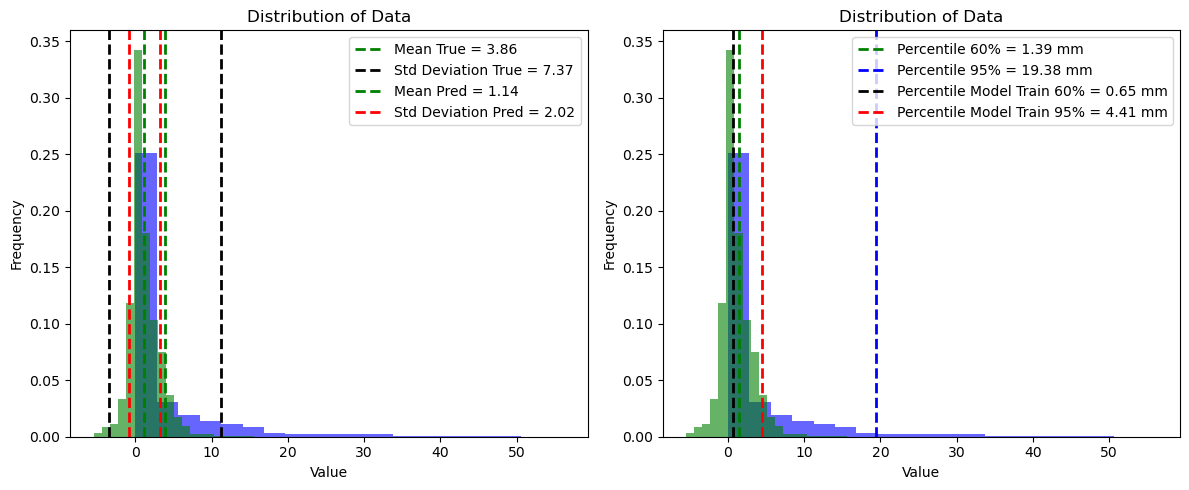

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 9141
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 4171
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 4110


In [42]:
compare(pred_ny, 'nn')

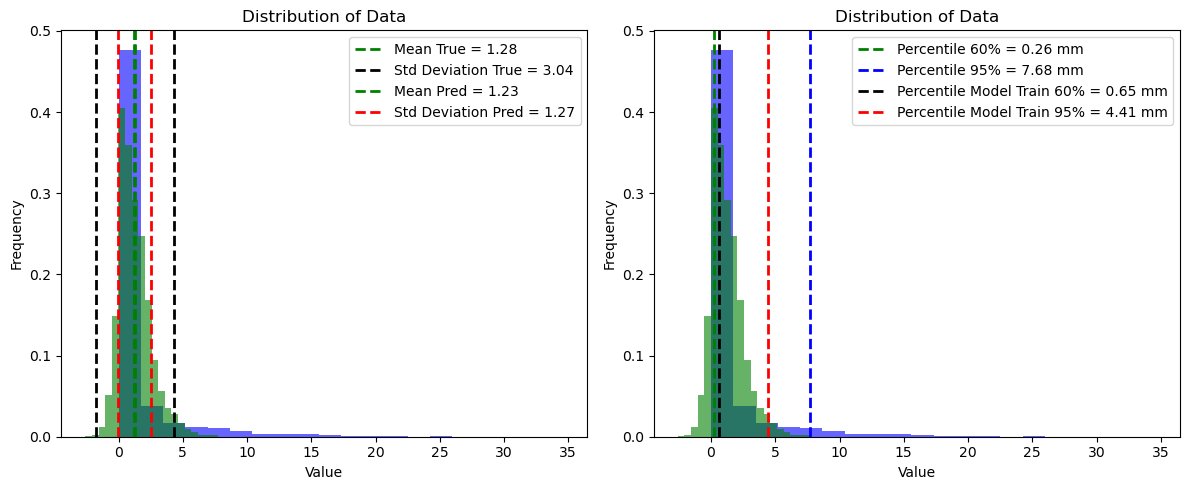

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 6261
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 1602
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 786


In [43]:
compare(pred_fl, 'nn')

**<span style="font-size: 24px;">Regression Discussion:</span>**

The negative predictions should not be allowed in model building. Could performance improve with more epochs? Could above results be due to **outlier removal** during model training? 

Secondly it is a bit of a disconnection between the percentile amounts the model was trained on versus the percentile amount present in the external data, the assumption that justifies the difference is that the location's exact rainfall quantities are not as indicative as the relative distribution of extreme rainfall events (2/above 95% percentile), moderate rainfall events (1/between 95th and 60th percentile), or low rainfall events (0/below 60th percentile).

**<span style="font-size: 24px;">Evaluate Neural Network Classifier</span>**

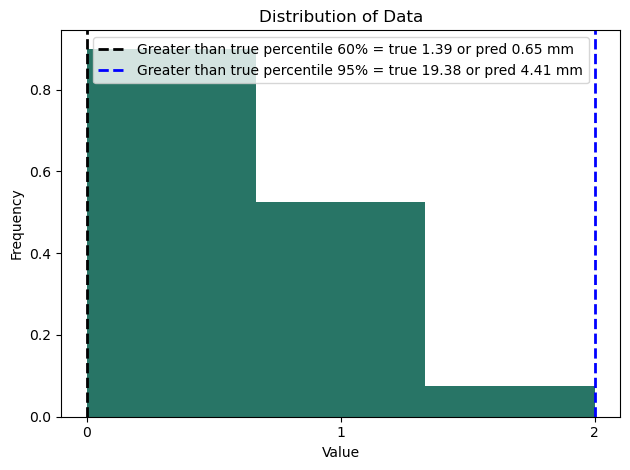

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 9141
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 4171
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 4110


In [44]:
compare(pred_ny, 'nnCat')

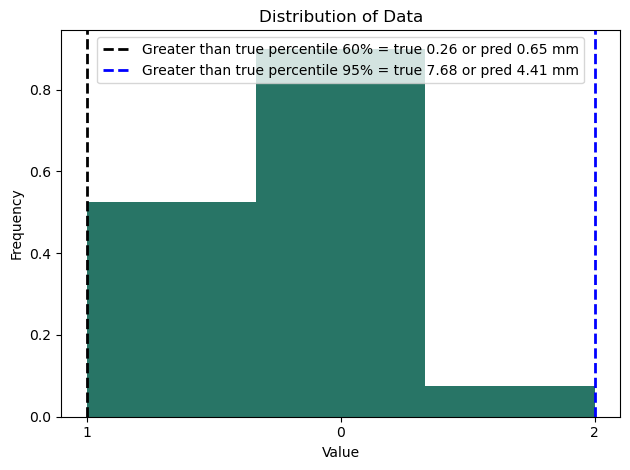

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 6261
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 1602
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 786


In [45]:
compare(pred_fl, 'nnCat')

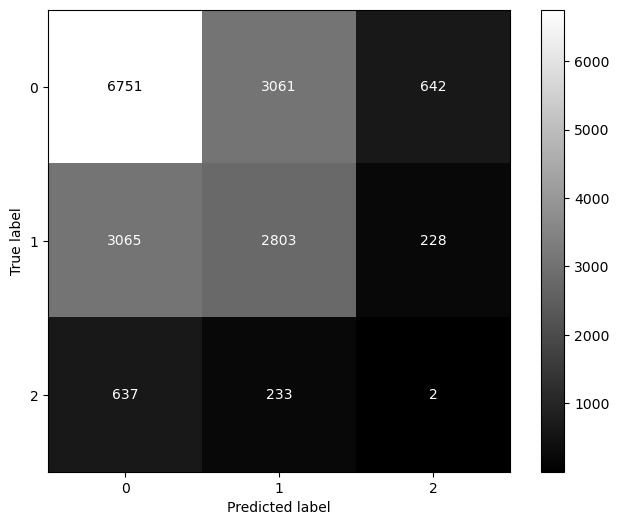

In [60]:
# Extract true labels and predicted labels
y_test_category = pred_ny['nxtpr_cat']
y_pred = pred_ny['nnCat']

# Create a confusion matrix
cm = confusion_matrix(y_test_category, y_pred, labels=np.unique(y_test_category))

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the confusion matrix with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='gray', ax=ax)

plt.show()

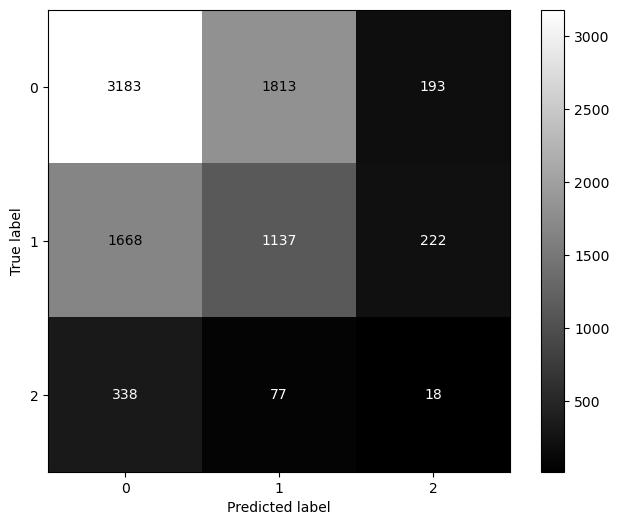

In [61]:
# Extract true labels and predicted labels
y_test_category = pred_fl['nxtpr_cat']
y_pred = pred_fl['nnCat']

# Create a confusion matrix
cm = confusion_matrix(y_test_category, y_pred, labels=np.unique(y_test_category))

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the confusion matrix with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='gray', ax=ax)

plt.show()

**<span style="font-size: 24px;">Neural Net Classifier Confusion Matrix Note</span>**

It is actually to be expected that the classifier would have an imbalanced confusion matrix because the data was grouped into bins based on 60% and the 95% of data.

**<span style="font-size: 24px;">Evaluate Random Forest & XGBoost Classifiers</span>**

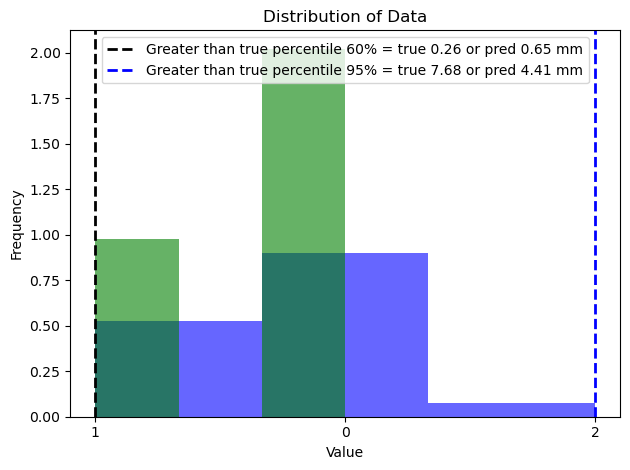

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 6261
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 1602
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 786


In [27]:
compare(pred_fl, 'rf')

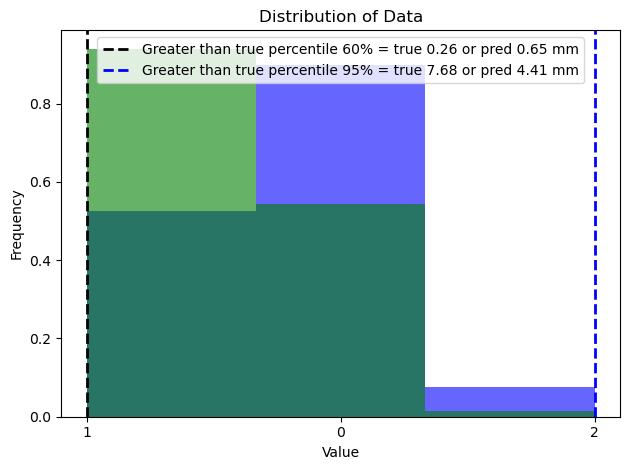

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 6261
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 1602
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 786


In [28]:
compare(pred_fl, 'xg')

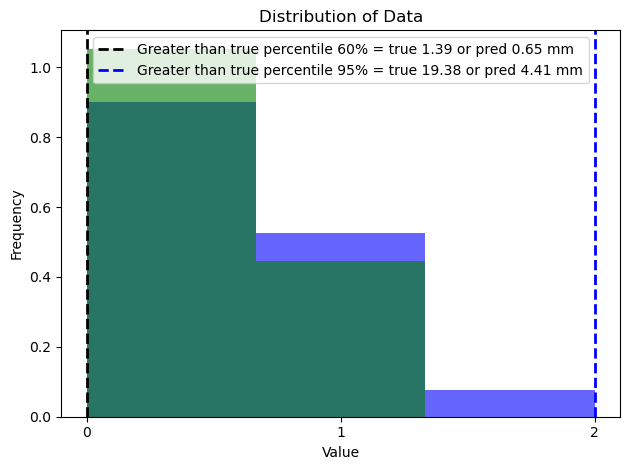

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 9141
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 4171
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 4110


In [29]:
compare(pred_ny, 'rf')

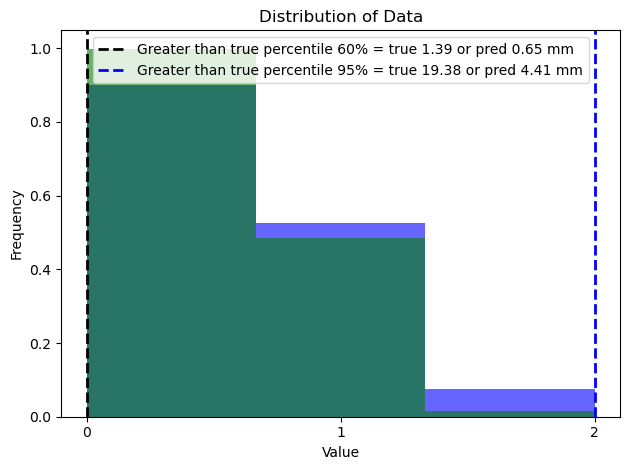

Category 0 is from 0 to 0.649 mm of rain
Number of data points below the 60.0% percentile: 9141
Category 1 is from 0.649 mm of rain to 4.408 mm of rain
Number of data points in the 60.0% to 95.0% range: 4171
Category 2 is from 4.408 mm of rain to the maximum
Number of data points above the 95.0% percentile: 4110


In [30]:
compare(pred_ny, 'xg')

**<span style="font-size: 24px;">Classifiers Discussion</span>**

Visually, it seems the XGBoost does a better job than Random Forest. Also, it visually seems that both classifiers better predict New York's Rainfall better than South Florida's.

However, visually the **neural network classifier** is the best.

A confusion matrix and F1 score could be implemented to evaluate the classifiers' performance further.

**<span style="font-size: 24px;">Further Work</span>**

	- Increasing number of epochs
	- Doing a trial without outlier removal to see whether the outlier removal is actually beneficial (especially since the prediction category bins are 95% and 60%)
	- Classifier data type comparison (for XGBoost int64)
    - Add previous prcp total feature. This would make it more of a temporal model which would likely improve results since the prcptotal current day's total precipitation is a feature with high importance. This would require further data processing: need to download the previous year's last month in order to calculate the first day of the first month's previous day's precipitation.